# Лабораторная работа 8. Построение пайплайна полиномиальной регрессии

## Подключение библиотек

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Загрузка данных и разделение на матрицу признаков и зависимую переменную

In [ ]:
dataset = pd.read_csv('imports-85.data')
dataset.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,123,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,123,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,123,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
print ("Матрица признаков"); print(X[:5])
print ("Зависимая переменная"); print(y[:5])

Матрица признаков
[[123]
 [123]
 [123]
 [164]
 [164]]
Зависимая переменная
['alfa-romero' 'alfa-romero' 'alfa-romero' 'audi' 'audi']


## Обработка пропущенных значений

In [ ]:
# from sklearn.preprocessing import Imputer
# imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
# imputer = imputer.fit(X[:, 1:3])
# X[:, 1:3] = imputer.transform(X[:, 1:3])
# print(X)

## Обработка категориальных данных

### Замена категории кодом (LabelEncoder)

In [ ]:
from sklearn.preprocessing import LabelEncoder
y = dataset['fuel-type']

labelencoder_y = LabelEncoder()

print("Зависимая переменная до обработки")

print(y.unique())

y = labelencoder_y.fit_transform(y)

print("Зависимая переменная после обработки")

print(y)

Зависимая переменная до обработки
['gas' 'diesel']
Зависимая переменная после обработки
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0
 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0
 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1]


### Применение OneHotEncoder

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# labelencoder_X = LabelEncoder()
# X[:, 0] = labelencoder_X.fit_transform(X[:, 0])
# onehotencoder = OneHotEncoder(categorical_features = [0])
# X = onehotencoder.fit_transform(X).toarray()
# print("Перекодировка категориального признака")
# print(X)

## Разделение выборки на тестовую и тренировочную

In [ ]:
# from sklearn.cross_validation import train_test_split
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, random_state = 0)

## Обучение модели

### Обучение линейной модели

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

### Обучение полиномиальной модели

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

## Предсказание, обработка и визуализация результатов

[0.79283226] [0.77509626]


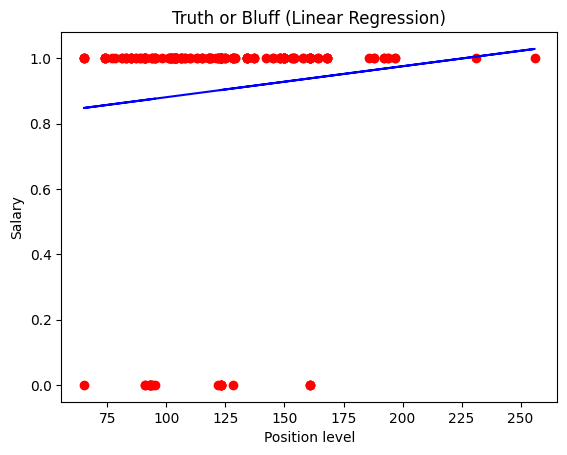

In [ ]:
y_pred_lin = lin_reg.predict([[6.5]])
y_pred_poly = lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))
print(y_pred_lin, y_pred_poly)
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

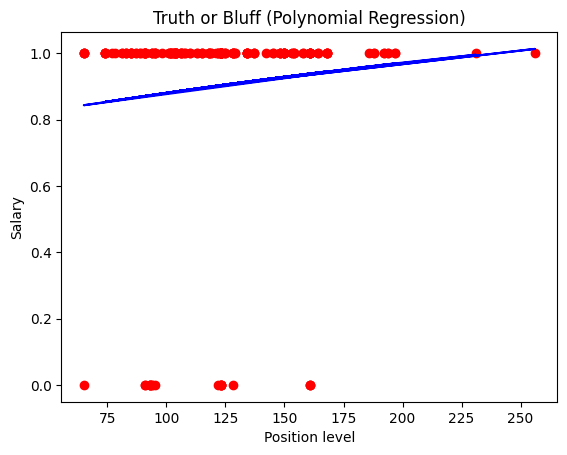

In [ ]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

<ipython-input-68-72d1221b8e2e>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


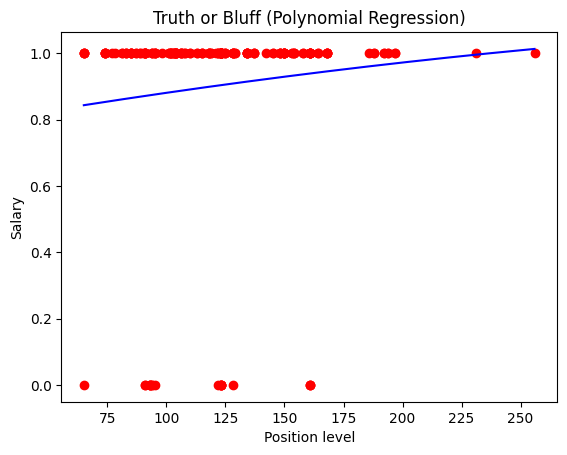

In [ ]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()